In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
#MANEA Dorin 
#NISTOR Iarina 21210925

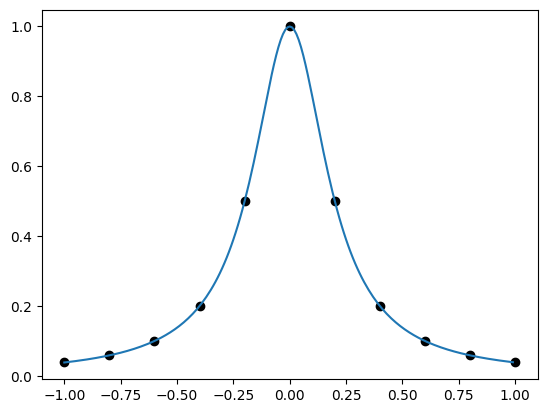

In [2]:
x = np.arange(-1,1,.01)
plt.plot(x,1/(1+25*x**2))
y = np.array([-1 + i / 5 for i in range(11)])
y_res = 1/(1+25*y**2)
plt.scatter(y, 1/(1+25*y**2), color="black")

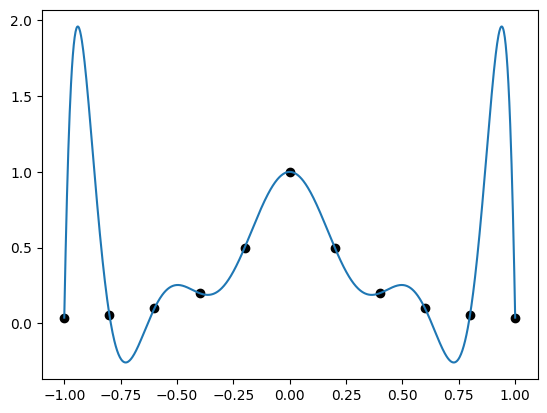

In [59]:
def lagrange_interpolation(x,y,x_inter):
    result = 0
    n= len(x)
    for i in range (n):
        term = y[i]
        for j in range(n):
            if i!=j:
                term*=(x_inter-x[j])/(x[i]-x[j])
        result+=term
    return result
def true_function(x):
    return 1/(1+25*x**2)
x_interv = np.linspace(-1,1,1000)
x_points = np.linspace(-1,1,11)
y_points = true_function(x_points)
lagrange_result = lagrange_interpolation(x_points,y_points,x_interv)
plt.plot(x_interv,lagrange_result)
plt.scatter(x_points,y_points,color='black')

In [ ]:
x = np.array([-1 + i / 5 for i in range(11)])
plt.scatter(x, 1/(1+25*x**2), color="black")
y = 1/(1+25*x**2)
l = []
x_cont = np.arange(-1,1,.01)
for i in range(11):
    prod = 1;
    for j in range(11):
        if i != j:
            prod *= (x_cont - x[j]) / (x[i] - x[j])
    l.append(prod)
L = [y[i]*l[i] for i in range(11)]
plt.plot(x, L)

In [ ]:
def le(x):
    li = []
    elem =1;
    for i in range(11):
        for j in range(11):
            if i!=j:
                elem = elem*((x - x[j]) / (x[i] - x[j]))
        li.append(elem)
    return li
            

In [ ]:
x = np.array([-1 + i / 5 for i in range(11)])
y = 1/(1+25*y**2)
l_x = le(x)
lag = [y[i]*l_x[i] for i in range(11)]
plt.plot(x,lag)

In [ ]:
#exo2

In [12]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt


# Calcul de la valeur de B-spline B_{ik}(x) pour la subdivision u
def B(x, k, i, u):
   if k == 0:
      return 1.0 if u[i] <= x < u[i+1] else 0.0
   if u[i+k] == u[i]:
      c1 = 0.0
   else:
      c1 = (x - u[i])/(u[i+k] - u[i]) * B(x, k-1, i, u)
   if u[i+k+1] == u[i+1]:
      c2 = 0.0
   else:
      c2 = (u[i+k+1] - x)/(u[i+k+1] - u[i+1]) * B(x, k-1, i+1, u)
   return c1 + c2


# Evalue la I-spline d'ordre k en x 
# direcuemenu en foncuion des Bspline pluuou que comme l'inu de la m-spline de degré k)    
def ispline(x, k, i, u):
    l=0
    while u[l]<=x :
        l=l+1
    j=l-1  
    if j<i+1: return 0.
    if j-k>i: return 1.
    v = 0.
    for m in range(i+1,j+1):
        v += B(x, k, m, u)
    return v

In [22]:
def bcurve(x,u,c,k) :
    b=0
    for i in range(len(c)) :
        b+=c[i]*B(x,k,i,u)
    return b

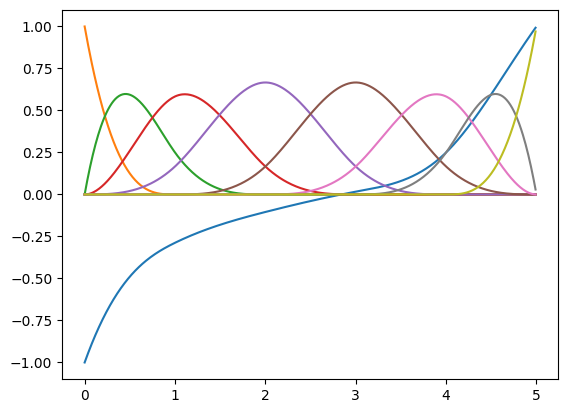

In [25]:
u=[0, 0, 0, 0, 1, 2, 3, 4, 5, 5, 5, 5]
x = np.arange(0,5,.01)
k=3
c = [-1,-0.5,-0.25,-0.1,0.025,0.1,0.75,1]
plt.plot(x,[bcurve(xi,u,c,k) for xi in x])

for i in range(len(c)):
    plt.plot(x, [B(xi, k, i, u) for xi in x])

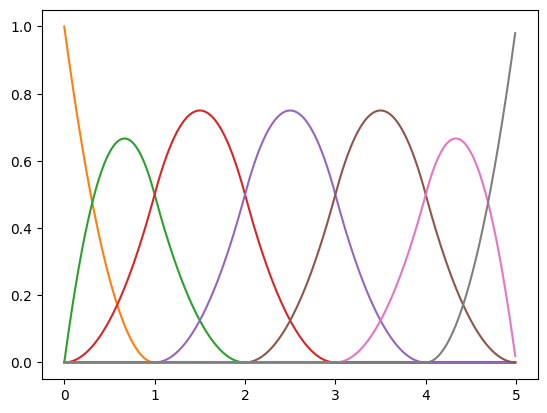

In [26]:
v=[0, 0, 0, 1, 2, 3, 4, 5, 5, 5]
k=2

for i in range(len(c)):
    plt.plot(x, [B(xi, k, i, u) for xi in x])
    
# nb_isplines = nb_bsplines - 1 

In [29]:
def icurve(x,u,c,k) :
    b=0
    for i in range(len(c)) :
        b+=c[i]*ispline(x,k,i,u)
    return b

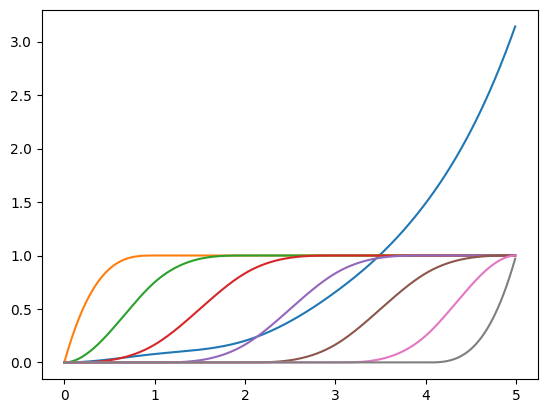

In [31]:
k=3
u=[0, 0, 0, 0, 1, 2, 3, 4, 5, 5, 5, 5]
x = np.arange(0,5,.01)
c = [0, 0.1, 0.025, 0.49, 0.75,1, 0.8]
plt.plot(x,[icurve(xi,u,c,k) for xi in x])

for i in range(len(c)):
    plt.plot(x, [ispline(xi, k, i, u) for xi in x])

In [39]:
#exo5
x=[1,6,8,12,10,14,15,17,20,23,3,4,7,12,13,16,18,19,20,21]
y=[14,15,14,11,14,6,7,8,6,2,12,14,13,5,7,8,7,6,5,3]
k=3
u=np.arange(0,24,4)

f = [B(xi, k, 2, u) for xi in x]
plt.plot(x, f)

IndexError: index 6 is out of bounds for axis 0 with size 6